In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
from all_funcs import mod_df
from all_funcs import add_factor
from all_funcs import three_graphs_one_plot
from all_funcs import fac_plots
from all_funcs import cap_outliers_by_list
from all_funcs import find_outliers_IQR
from all_funcs import ult_analysis
from all_funcs import test_mannwhitneyu
from all_funcs import siegel_tukey
from all_funcs import get_corr
from all_funcs import plot_pred
from all_funcs import train_test_split
from all_funcs import series_to_supervised
from all_funcs import pred_val
from all_funcs import graphs
from all_funcs import make_autocorr_plot
from all_funcs import make_autocorr_plot
# from all_funcs import persistence
# from all_funcs import make_forecasts
# from all_funcs import evaluate_forecasts
# from all_funcs import plot_forecasts
# from all_funcs import split_into_sequences
# from all_funcs import get_train_test_sets
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.ensemble import RandomForestRegressor
from lineartree import LinearBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
dfs = []
for name in ['datasets\альфа-банк.xlsx', 'datasets\банк-втб.xlsx' , 'datasets\сбербанк-россии.xlsx']:
  dfs.append(mod_df(name))

In [13]:
for i in range(len(dfs)):
  for name in ['datasets/rucbitr3+.xlsx', 'datasets/rucbcp3a3yns.xlsx',  'datasets/indexes.xlsx', 'datasets/ставка-ruonia.xlsx', 'datasets/usd_rub-(fx) (1).xlsx',
              'datasets/corp_bonds_volume.xlsx', 'datasets/cpi.xlsx', 'datasets/inflation.xlsx', 'datasets/rub-yield-curve-10y (1).xlsx',
               'datasets/ofz_volume.xlsx',  'datasets/umemployment.xlsx']:
    dfs[i] = add_factor(dfs[i], name)
    dfs[i]['key_0'] = pd.to_datetime(dfs[i]['key_0'])
    dfs[i] = dfs[i].set_index('key_0')

In [14]:
dfs[0]

,Indicative,YTM Indicative,G-spread,t,ISIN,name,RUCBITR3+,RUCBCP3A3YNS,indexes,Ставка RUONIA,USD/RUB (FX),"Объем рынка корпоративных облигаций - Россия, RUB",Россия базовые потребительские цены,Россия уровень инфляции в годовом выражении,RUB Yield Curve 10Y,"Объем рынка ОФЗ - Россия, RUB",Россия уровень безработицы
key_0,,,,,,,,,,,,,,,,,
2022-01-03,96.550,8.1217,-6.763896,1,RU000A102A07,datasets\альфа-банк.xlsx,579.67,100.51,9.5,8.04,74.58064,17569.19,100.8,8.73,8.3678,15609.31,4.4
2022-01-04,96.235,8.3266,13.549479,2,RU000A102A07,datasets\альфа-банк.xlsx,581.62,100.72,9.5,8.04,75.16675,17569.19,100.8,8.73,8.3704,15609.31,4.4
2022-01-05,95.690,8.6823,50.324341,3,RU000A102A07,datasets\альфа-банк.xlsx,582.30,100.80,9.5,8.04,76.11534,17569.19,100.8,8.73,8.3386,15609.31,4.4
2022-01-06,95.505,8.8061,36.877612,4,RU000A102A07,datasets\альфа-банк.xlsx,581.72,100.56,9.5,8.04,76.43210,17569.19,100.8,8.73,8.4660,15609.31,4.4
2022-01-07,95.505,8.8061,36.877612,5,RU000A102A07,datasets\альфа-банк.xlsx,580.31,100.32,9.5,8.04,75.27871,17569.19,100.8,8.73,8.5759,15609.31,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13,98.350,8.7997,119.369035,435,RU000A102A07,datasets\альфа-банк.xlsx,626.14,101.55,7.5,7.02,75.55000,21262.38,100.1,3.50,10.7822,18737.62,3.5
2023-03-14,98.445,8.6456,98.215665,436,RU000A102A07,datasets\альфа-банк.xlsx,626.41,101.56,7.5,7.14,75.75000,21262.38,100.1,3.50,10.8069,18737.62,3.5
2023-03-15,98.400,8.7352,117.175971,437,RU000A102A07,datasets\альфа-банк.xlsx,626.72,101.59,7.5,7.29,76.42500,21262.38,100.1,3.50,10.8428,18737.62,3.5


In [15]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2022-01-03 to 2023-03-17
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         439 non-null    float64
 1   YTM Indicative                                     439 non-null    float64
 2   G-spread                                           439 non-null    float64
 3   t                                                  439 non-null    int64  
 4   ISIN                                               439 non-null    object 
 5   name                                               439 non-null    object 
 6   RUCBITR3+                                          439 non-null    float64
 7   RUCBCP3A3YNS                                       439 non-null    float64
 8   indexes                                            439 non-null    floa

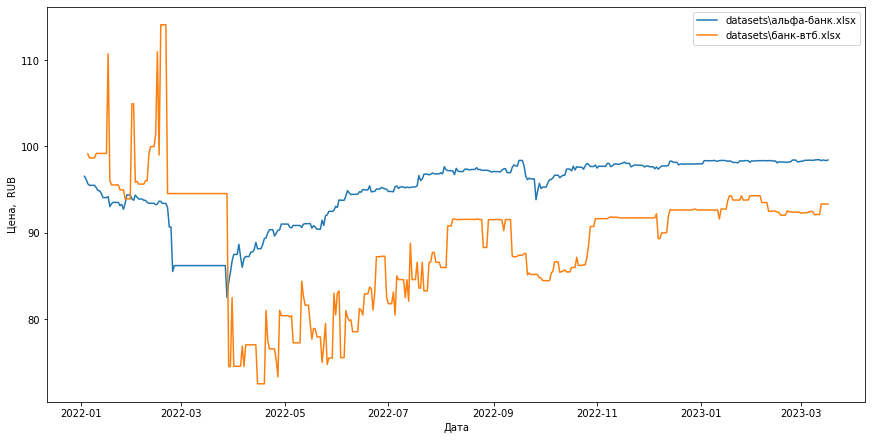

In [16]:
three_graphs_one_plot([dfs[0], dfs[1]])

In [17]:
df_alph_full = dfs[0][dfs[0].index >= '2022-05-01']
df_alph_full['t'] = [i for i in range(len(df_alph_full))]

C:\Temp\ipykernel_15536\613649094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alph_full['t'] = [i for i in range(len(df_alph_full))]


Text(0.5, 0, 'Дата')

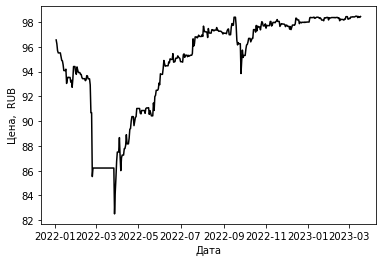

In [18]:
plt.plot(pd.date_range(start='2022-01-03',end='2023-03-17'), dfs[0]['Indicative'], 'k-')
plt.ylabel("Цена,  RUB")
plt.xlabel("Дата")

In [19]:
fac_plots(df_alph_full)

In [ ]:
df_alph = df_alph_full.copy()

In [ ]:
outliers = {}
for name in df_alph.select_dtypes(include = numerics).columns:
  outliers['{}'.format(name)] = find_outliers_IQR(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
  if len(outliers[name]) > 0:
    df_alph[name] = cap_outliers_by_list(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

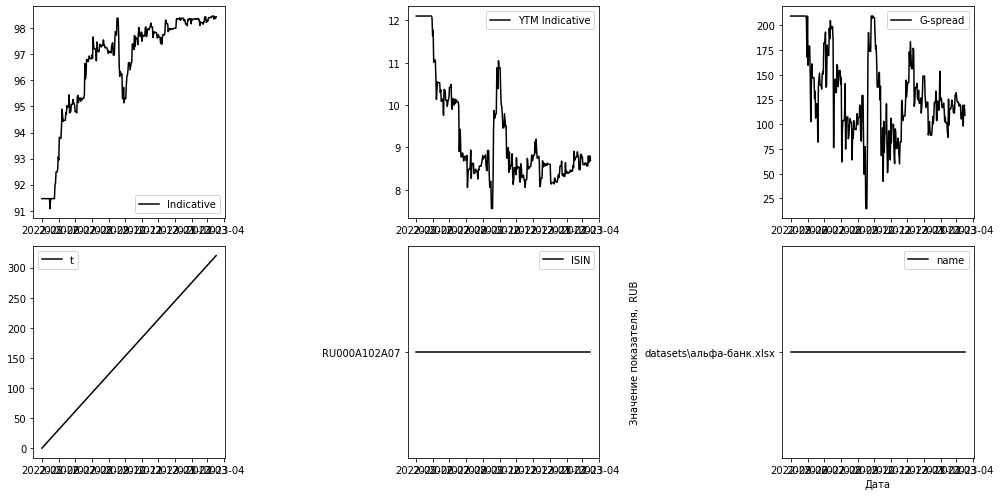

In [ ]:
fac_plots(df_alph)

MSE = 0.01038


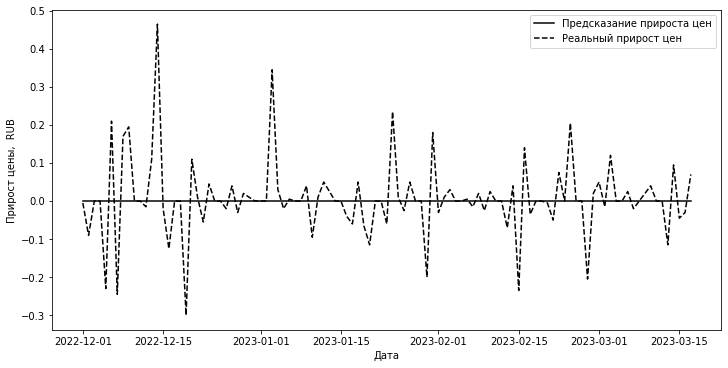

In [ ]:
#Trivial model

pred_val((df_alph_full['Indicative'][213:] - df_alph_full['Indicative'][213:].shift(1)).dropna(), [0 for i in range(107)])

### Linear models

In [ ]:
siegel_tukey(df_alph['Indicative'])
test_mannwhitneyu(df_alph['Indicative'])

z value: -0.568
Probably the same distribution
stat=1.01e+03, p=1.01e+03
Probably different distributions


In [ ]:
df_alph['Indicative'] = df_alph['Indicative'] - df_alph['Indicative'].shift(1)
df_alph_uni = df_alph[['Indicative', 't']]
df_alph_uni = df_alph_uni[1:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_alph_uni['t'], df_alph_uni['Indicative'], 107)

In [ ]:
import statsmodels.api as sm

X_lm = sm.add_constant(X_train)
regr = sm.OLS(y_train, X_lm)
regr2 = regr.fit()
print(regr2.summary())

                            OLS Regression Results                            
Dep. Variable:             Indicative   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.243
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.266
Time:                        15:10:54   Log-Likelihood:                -23.056
No. Observations:                 213   AIC:                             50.11
Df Residuals:                     211   BIC:                             56.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0655      0.037      1.758      0.0

MSE = 0.01133


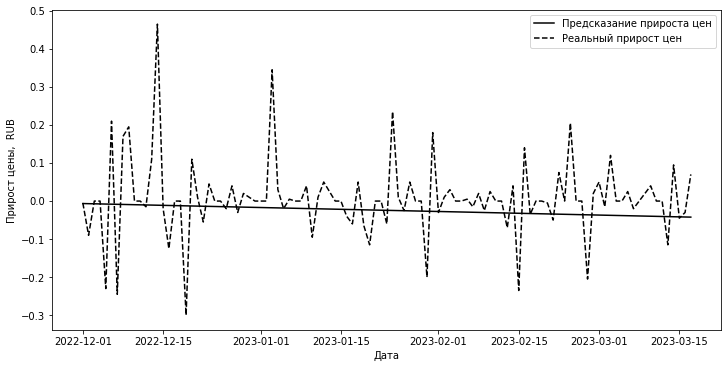

In [ ]:

prediction = regr2.predict(sm.add_constant(X_test))

print('MSE = %.4g' % mean_squared_error(y_test, prediction))

plot_pred(prediction, y_test)

### ARIMA

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


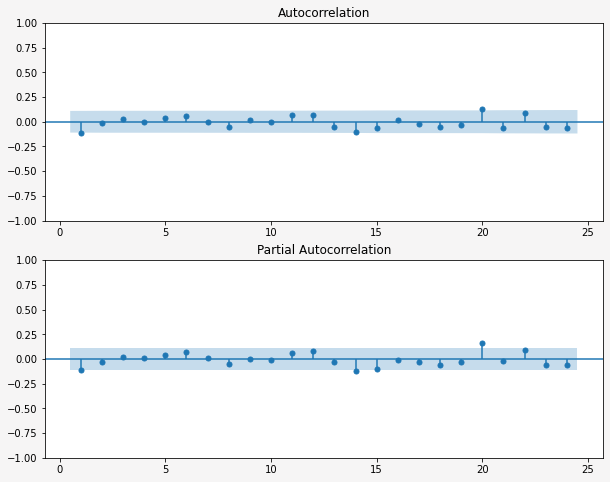

In [ ]:
make_autocorr_plot(df_alph_uni['Indicative'])

In [ ]:
train = df_alph_uni['Indicative'][:213]
test = df_alph_uni['Indicative'][213:]

In [ ]:
arima_model = ARIMA(train, order = (2,0,0))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:             Indicative   No. Observations:                  213
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -22.286
Date:                Sat, 10 Jun 2023   AIC                             52.571
Time:                        15:10:55   BIC                             66.016
Sample:                    05-02-2022   HQIC                            58.005
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0295      0.016      1.801      0.072      -0.003       0.062
ar.L1         -0.1128      0.051     -2.225      0.026      -0.212      -0.013
ar.L2         -0.0321      0.081     -0.398      0.6

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MSE = 0.01085


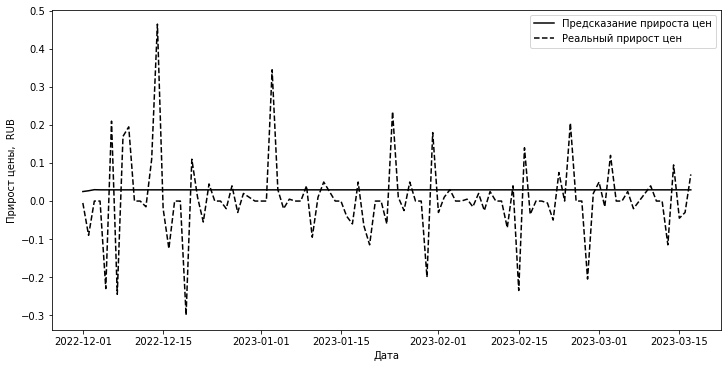

In [ ]:
prediction = model.forecast(107)

print('MSE = %.4g' % mean_squared_error(test, prediction))

plot_pred(prediction, test)

### LSTM

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = pd.DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
  cols.append(df.shift(i))
 names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
  cols.append(df.shift(-i))
 if i == 0:
  names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
 else:
  names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = pd.concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
  agg.dropna(inplace=True)
 return agg


def persistence(last_ob, n_seq):
 return [last_ob for i in range(n_seq)]

# evaluate the persistence model
def make_forecasts(train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = persistence(X[-1], n_seq)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = test[:,(n_lag+i)]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = np.sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))
                
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	plt.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i
		off_e = off_s + len(forecasts[i])
		xaxis = [x for x in range(off_s, off_e)]
		plt.plot(xaxis, forecasts[i], color='red')
	# show the plot
	plt.show()

In [ ]:
def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    X_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    X_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return X_train, y_train, X_test, y_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
price = df_alph['Indicative'].values.reshape(-1, 1)
scaled_price = scaler.fit_transform(price)

In [ ]:
seq_len = 50

x_train, y_train, x_test, y_test = get_train_test_sets(scaled_price, seq_len, train_frac=0.61)
# x_train, y_train, x_test, y_test = get_train_test_sets(df_alph['Indicative'].values.reshape(-1, 1), seq_len, train_frac=0.525)


In [ ]:
len(y_test)

107

In [ ]:
# fraction of the input to drop; helps prevent overfitting
dropout = 0.2
window_size = seq_len - 1

# build a 3-layer LSTM RNN
model = keras.Sequential()

model.add(
    LSTM(window_size, return_sequences=True, 
         input_shape=(window_size, x_train.shape[-1]))
)

model.add(Dropout(rate=dropout))
# Bidirectional allows for training of sequence data forwards and backwards
model.add(
    Bidirectional(LSTM((window_size * 2), return_sequences=True)
)) 

model.add(Dropout(rate=dropout))
model.add(
    Bidirectional(LSTM(window_size, return_sequences=False))
) 

model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))

In [ ]:
x_train = x_train[1:]
y_train = y_train[1:]

In [ ]:
batch_size = 15

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    shuffle=False,
    validation_split=0.2
)

Epoch 1/10
9/9 [==============================] - 15s 481ms/step - loss: 0.0932 - val_loss: 0.0108
Epoch 2/10
9/9 [==============================] - 1s 79ms/step - loss: 0.0232 - val_loss: 0.0071
Epoch 3/10
9/9 [==============================] - 1s 80ms/step - loss: 0.0192 - val_loss: 0.0067
Epoch 4/10
9/9 [==============================] - 1s 117ms/step - loss: 0.0179 - val_loss: 0.0053
Epoch 5/10
9/9 [==============================] - 1s 91ms/step - loss: 0.0172 - val_loss: 0.0052
Epoch 6/10
9/9 [==============================] - 1s 75ms/step - loss: 0.0173 - val_loss: 0.0049
Epoch 7/10
9/9 [==============================] - 1s 76ms/step - loss: 0.0169 - val_loss: 0.0049
Epoch 8/10
9/9 [==============================] - 1s 80ms/step - loss: 0.0164 - val_loss: 0.0048
Epoch 9/10
9/9 [==============================] - 1s 100ms/step - loss: 0.0168 - val_loss: 0.0049
Epoch 10/10
9/9 [==============================] - 1s 79ms/step - loss: 0.0171 - val_loss: 0.0049


In [ ]:
y_pred = model.predict(x_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

MSE = 0.01085


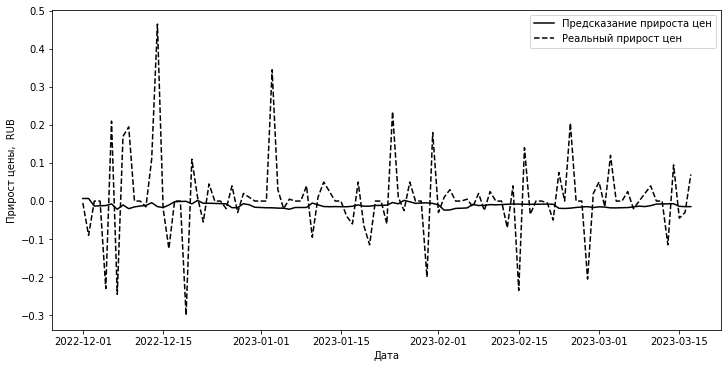

In [ ]:
pred_val(y_test_orig, y_pred_orig)

### Multivariate models

In [ ]:
df_alph = df_alph_full.copy()
df_alph = df_alph.select_dtypes(include=numerics)

In [ ]:
df_alph.head(5)

,Indicative,YTM Indicative,G-spread,t,RUCBITR3+,RUCBCP3A3YNS,indexes,Ставка RUONIA,USD/RUB (FX),"Объем рынка корпоративных облигаций - Россия, RUB",Россия базовые потребительские цены,Россия уровень инфляции в годовом выражении,RUB Yield Curve 10Y,"Объем рынка ОФЗ - Россия, RUB",Россия уровень безработицы
key_0,,,,,,,,,,,,,,,
2022-05-01,91.020,13.0409,327.521838,0,538.48,95.73,14.0,13.68,73.35063,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-02,91.020,13.0409,327.521838,1,538.48,95.73,14.0,13.68,70.92121,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-03,91.020,13.0409,327.521838,2,538.48,95.73,14.0,13.68,68.13433,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-04,90.645,13.4260,336.285278,3,538.48,95.73,14.0,13.68,66.08850,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-05,90.585,13.4913,328.867961,4,537.53,95.75,11.0,14.00,65.88899,16888.34,100.4,17.1,10.4369,15723.28,3.9


In [ ]:
outliers = {}
for name in df_alph.select_dtypes(include = numerics).columns:
  outliers['{}'.format(name)] = find_outliers_IQR(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
  if len(outliers[name]) > 0:
    df_alph[name] = cap_outliers_by_list(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

In [ ]:
df_alph = (df_alph - df_alph.shift(1)).dropna()

In [ ]:

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-08-30'<df_alph.index) & (df_alph.index<='2022-10')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-08-30'<df_alph.index) & (df_alph.index<='2022-10')].index, name])

In [ ]:
fac_plots(df_alph.drop(['t', 'indexes'].rename(columns = {'Indicative': 'Прирост цены, руб.', 'YTM Indicative': 'Прирост доходности к погашению, %', 'G-spread': 'Прирост g-спреда, руб.', 'RUCBITR3+': 'Прирост значений индекса совокупного дохода МосБиржи', 'RUCBCP3A3YNS': 'Прирост значений индекса корпоративных облигаций'}), axis=1))

NameError: name 'df_alph' is not defined

In [ ]:
df_alph['t'] = [i for i in range(len(df_alph))]

In [ ]:
df_alph.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2022-05-02 to 2023-03-17
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         320 non-null    float64
 1   YTM Indicative                                     320 non-null    float64
 2   G-spread                                           320 non-null    float64
 3   t                                                  320 non-null    int64  
 4   RUCBITR3+                                          320 non-null    float64
 5   RUCBCP3A3YNS                                       320 non-null    float64
 6   indexes                                            320 non-null    float64
 7   Ставка RUONIA                                      320 non-null    float64
 8   USD/RUB (FX)                                       320 non-null    floa

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2022-05-02 to 2023-03-17
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         320 non-null    float64
 1   YTM Indicative                                     320 non-null    float64
 2   G-spread                                           320 non-null    float64
 3   t                                                  320 non-null    int64  
 4   RUCBITR3+                                          320 non-null    float64
 5   RUCBCP3A3YNS                                       320 non-null    float64
 6   indexes                                            320 non-null    float64
 7   Ставка RUONIA                                      320 non-null    float64
 8   USD/RUB (FX)                                       320 non-null    floa

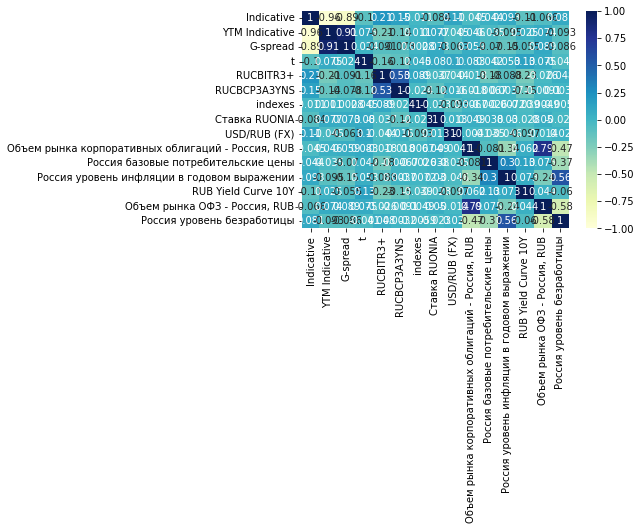

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 4
key_0
2022-05-16   -0.380
2022-05-17    0.380
2022-05-25    0.520
2022-05-27    0.415
2022-05-31    0.475
              ...  
2023-01-30   -0.200
2023-01-31    0.180
2023-02-15   -0.235
2023-02-24    0.205
2023-02-27   -0.205
Name: Indicative, Length: 76, dtype: float64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 5


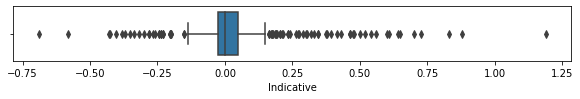

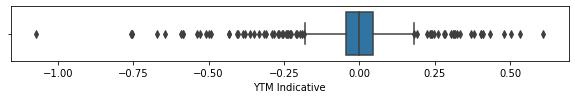

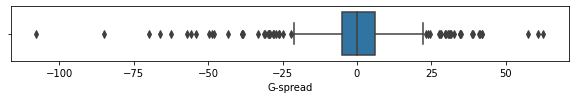

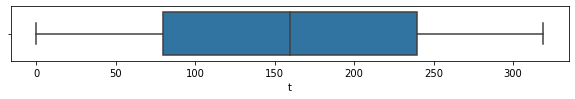

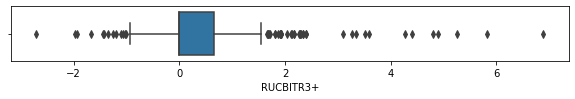

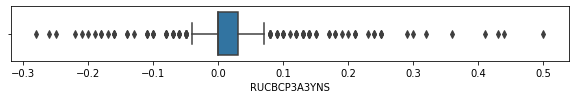

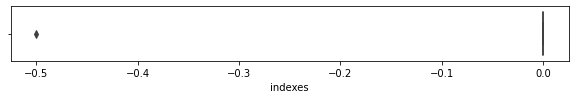

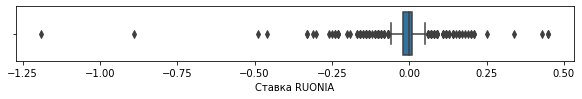

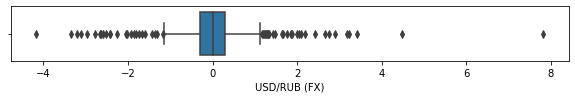

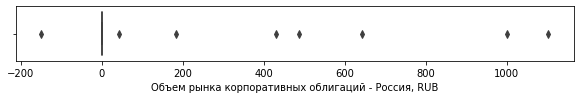

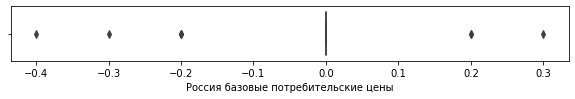

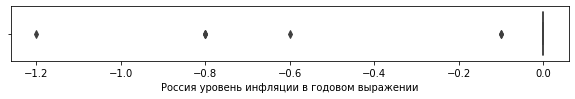

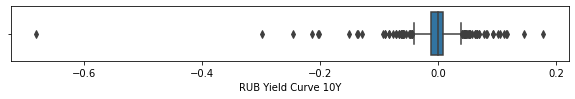

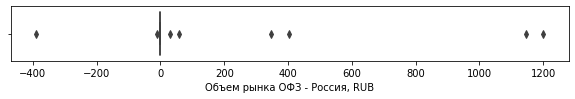

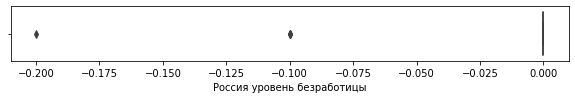

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 6


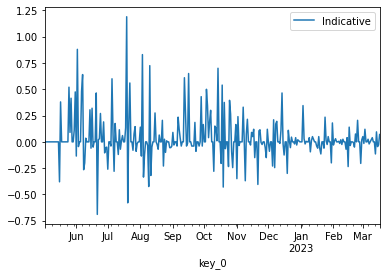

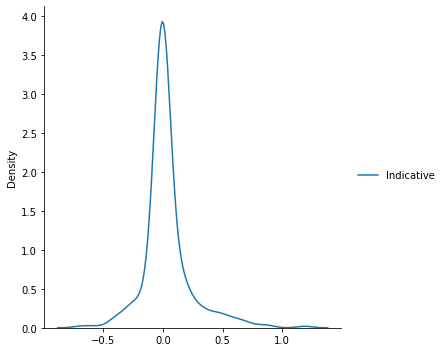

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 7
Тест Jarque Bera
        JB                p-value                skew             kurtosis    
------------------------------------------------------------------------------
647.4158862744564 2.6027145938861065e-141 1.4719793385950364 9.315797556728802
------------------------------------------------------------------------------

Тест Шапиро-Уилк
Statistics=0.799, p-value=0.000
Отклонить гипотезу о нормальности
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 8
Тест Jarque Bera
        JB                p-value                skew             kurtosis    
------------------------------------------------------------------------------
647.4158862744564 2.6027145938861065e-141 1.4719793385950364 9.315797556728802
------------------------------------------------------------------------------

Тест Шапиро-Уилк
Statistics=0.799, p-value=0.000
Отклонить гипотезу о нормальности
None


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


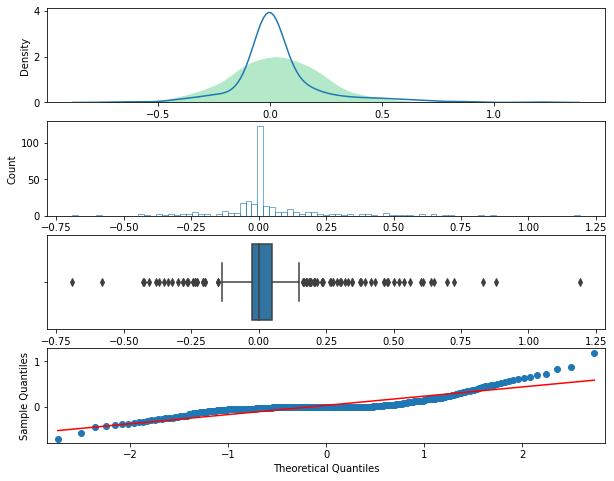

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 9


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


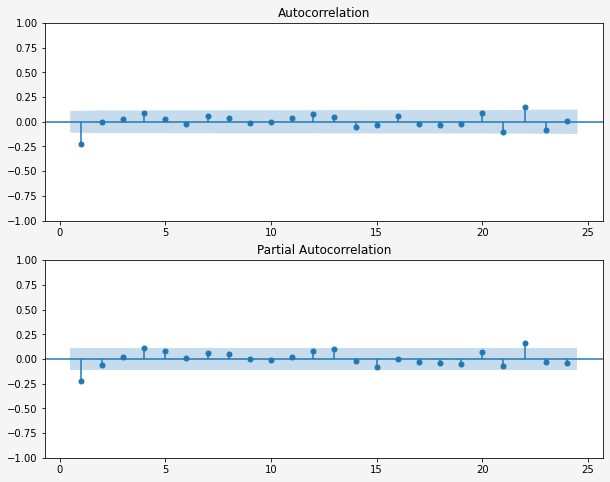

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 10
Тестирование средних. Статистика Стьюдента: 0.16794653156639117. Критическое значение: 1.6544935026291934
Тестирование дисперсий. Статистика Фишера: 0.3751492942353716. Критическое значение: 1.2991010723726828
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 11
excess kurtosis of normal distribution (should be 0): 6.315797556728802
skewness of normal distribution (should be 0): 1.4719793385950364


In [ ]:
ult_analysis(df_alph)

In [ ]:
siegel_tukey(df_alph['Indicative'])
test_mannwhitneyu(df_alph['Indicative'])

z value: 0.465
Probably the same distribution
stat=1.32e+04, p=1.32e+04
Probably the same distribution


<AxesSubplot:>

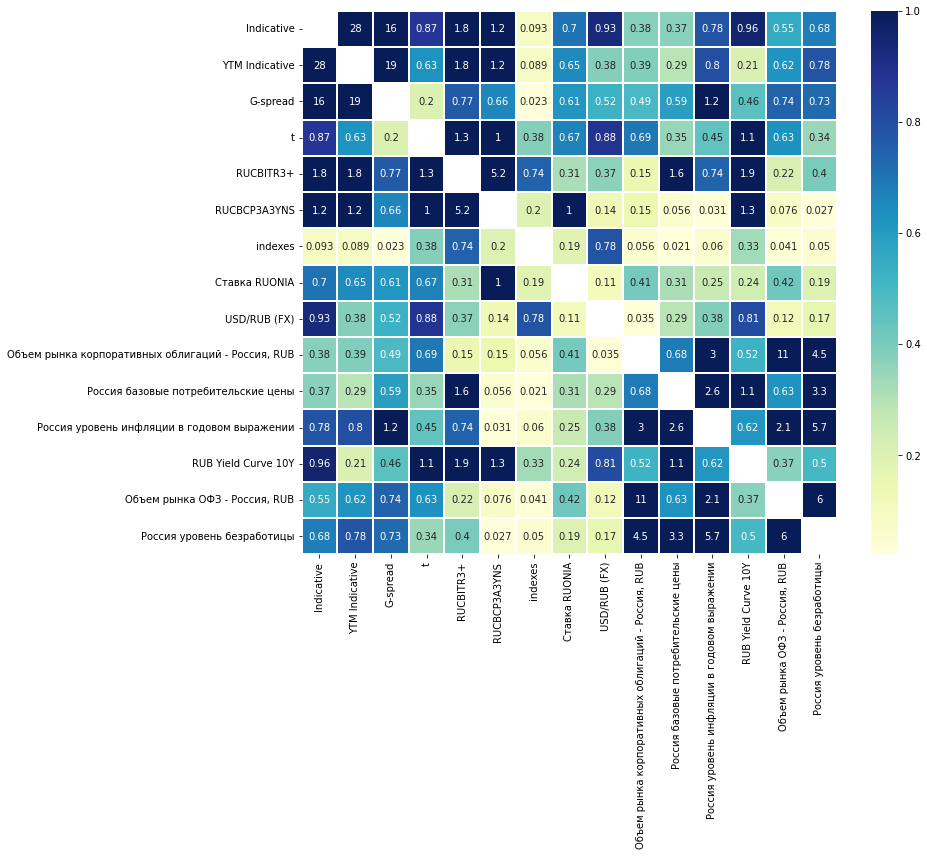

In [ ]:
corrmat = df_alph.corr(method='pearson')

corrmat_significance = np.abs(corrmat/np.sqrt(1-np.power(corrmat,2))*np.sqrt(70))
# corrmat_significance.values[[np.arange(corrmat_significance.shape[0])]*2] = 0

f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat_significance, ax=ax, cmap="YlGnBu", linewidths=0.1, annot=True, vmax=1)

### Feature selection

In [ ]:
for name in df_alph.drop('Indicative', axis = 1).columns:
    df_alph[name] = df_alph[name].shift(1)
df_alph = df_alph.dropna()

In [ ]:
X = df_alph.drop('Indicative', axis = 1).select_dtypes(include=numerics)
Y = df_alph['Indicative']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

test = SelectKBest(score_func=mutual_info_regression, k=4)
fit = test.fit(X, Y)
set_printoptions(precision=3)
print(fit.scores_)

[0.048 0.023 0.01  0.102 0.013 0.004 0.029 0.    0.016 0.    0.006 0.072
 0.    0.   ]


[177.145  16.27   35.965  18.401 132.882  19.645  96.738  19.607   7.084
  17.29   98.02   11.984 159.395  14.163]

In [ ]:
X.columns

Index(['YTM Indicative', 'G-spread', 't', 'RUCBITR3+', 'RUCBCP3A3YNS',
       'indexes', 'Ставка RUONIA', 'USD/RUB (FX)',
       'Объем рынка корпоративных облигаций - Россия, RUB',
       'Россия базовые потребительские цены',
       'Россия уровень инфляции в годовом выражении', 'RUB Yield Curve 10Y',
       'Объем рынка ОФЗ - Россия, RUB', 'Россия уровень безработицы'],
      dtype='object')

In [ ]:
# alph_feat = df_alph[['Indicative', 'YTM Indicative', 'G-spread', 'indexes', 'RUCBITR3+']]
alph_feat = df_alph[['Indicative', 'YTM Indicative', 'G-spread', 'USD/RUB (FX)']]

In [ ]:
alph_feat.head(2)

,Indicative,YTM Indicative,G-spread,USD/RUB (FX)
key_0,,,,
2022-05-03,0.0,0.0,0.0,-2.42942
2022-05-04,0.0,0.0,0.0,-2.78688


In [ ]:
len(df_alph)

319

## Modeling

In [ ]:
y = alph_feat['Indicative']
X = alph_feat.drop('Indicative', axis = 1)

In [ ]:
n_test = 107
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from skopt.space import Real, Integer
from skopt.utils import use_named_args

n_features = X.shape[1]

reg = XGBRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4], res_gp.x[5]))


Best score=0.0553
Best parameters:
- max_depth=1
- learning_rate=0.602240
- max_features=1
- min_samples_split=2
- min_samples_leaf=100
- n_estimators=11


MSE = 0.015


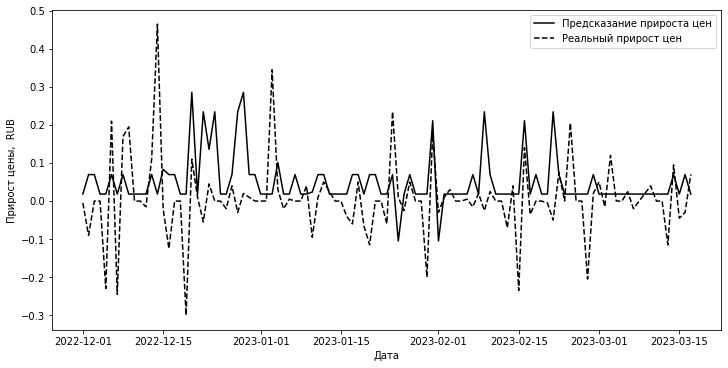

In [ ]:

regressor = XGBRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], max_features=res_gp.x[2], min_samples_split=res_gp.x[3], min_samples_leaf=res_gp.x[4], n_estimators=res_gp.x[5])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

MSE = 0.01085


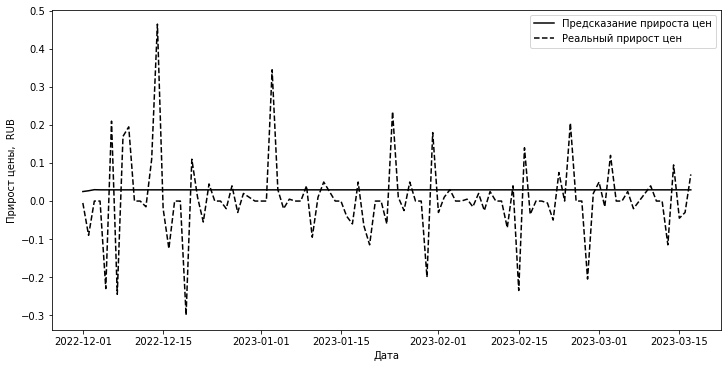

In [ ]:
pred_val(y_test, prediction)

In [ ]:
n_features = X.shape[1]

reg = RandomForestRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))


Best score=0.0531
Best parameters:
- max_depth=4
- max_features=1
- min_samples_split=100
- min_samples_leaf=1
- n_estimators=51


In [ ]:
0.009966/0.01038

0.9601156069364161

MSE = 0.01306


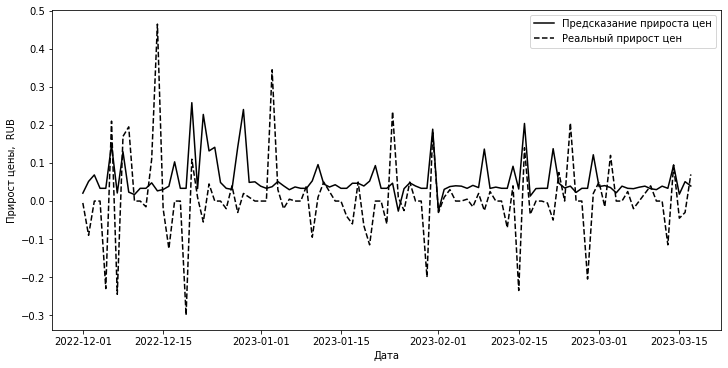

In [ ]:

regressor = RandomForestRegressor(max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf=res_gp.x[3], n_estimators=res_gp.x[4])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
X_test.loc['2022-12-01']

YTM Indicative    -0.139300
G-spread         -16.963104
USD/RUB (FX)       0.184500
Name: 2022-12-01 00:00:00, dtype: float64

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\1833263988.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\1833263988.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted w

MSE = 0.01306


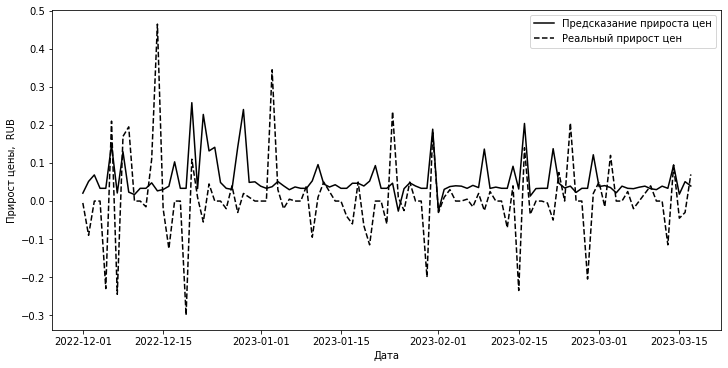

In [ ]:
prediction = []
X_data = X_train.copy()
y_data = y_train.copy()
regressor = RandomForestRegressor(max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf=res_gp.x[3], n_estimators=res_gp.x[4])
for t in X_test.index:
   model = (regressor.fit(X_data.values, y_data.values))
   pred = model.predict(X_test.loc[t:])
   prediction.append(pred[0])
   X_data = X_data.append(X_test.loc[t])
   y_data.loc[t] = y_test.loc[t]

pred_val(y_test, predictions)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

n_features = X.shape[1]

reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4], res_gp.x[5]))


Best score=0.0512
Best parameters:
- max_depth=1
- learning_rate=0.074108
- max_features=1
- min_samples_split=80
- min_samples_leaf=8
- n_estimators=83


In [ ]:
0.01023/0.01038

0.9855491329479767

MSE = 0.01429


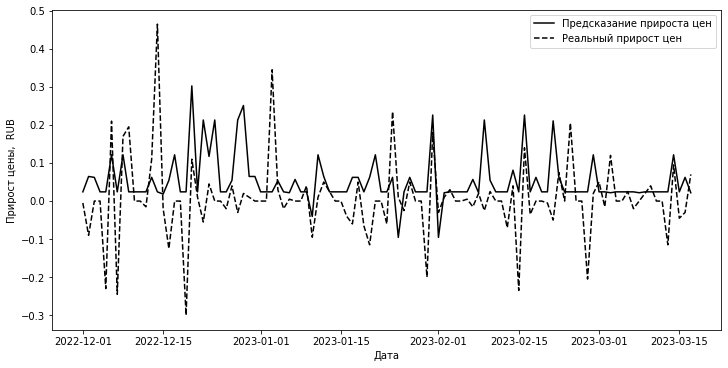

In [ ]:

regressor = GradientBoostingRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], max_features=res_gp.x[2], min_samples_split=res_gp.x[3], min_samples_leaf=res_gp.x[4], n_estimators=res_gp.x[5])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\3465971443.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\3465971443.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor 

MSE = 0.01429


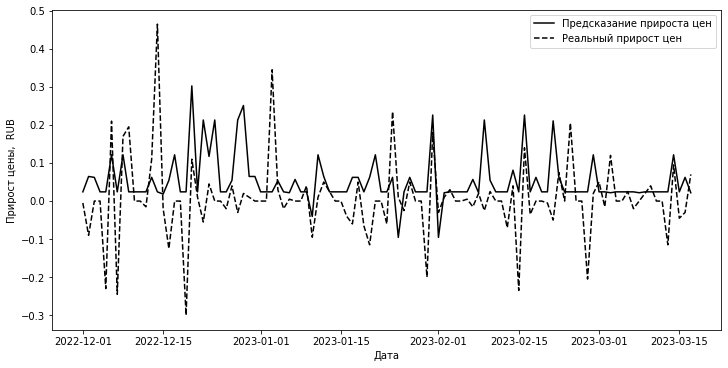

In [ ]:
prediction = []
X_data = X_train.copy()
y_data = y_train.copy()
regressor = GradientBoostingRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], max_features=res_gp.x[2], min_samples_split=res_gp.x[3], min_samples_leaf=res_gp.x[4], n_estimators=res_gp.x[5])
for t in X_test.index:
   model = (regressor.fit(X_data.values, y_data.values))
   pred = model.predict(X_test.loc[t:])
   prediction.append(pred[0])
   X_data = X_data.append(X_test.loc[t])
   y_data.loc[t] = y_test.loc[t]

pred_val(y_test, predictions)

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor()
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2]))


Best score=0.0513
Best parameters:
- max_depth=1
- learning_rate=0.033299
- min_samples_leaf=15


MSE = 0.01419


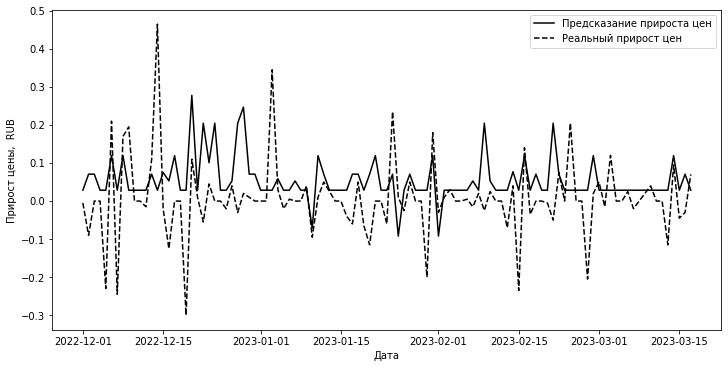

In [ ]:
regressor = HistGradientBoostingRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], min_samples_leaf=res_gp.x[2])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
prediction = []
X_data = X_train.copy()
y_data = y_train.copy()
regressor = HistGradientBoostingRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], min_samples_leaf=res_gp.x[2])
for t in X_test.index:
   model = (regressor.fit(X_data.values, y_data.values))
   pred = model.predict(X_test.loc[t:])
   prediction.append(pred[0])
   X_data = X_data.append(X_test.loc[t])
   y_data.loc[t] = y_test.loc[t]

pred_val(y_test, predictions)

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but HistGradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\3643578848.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but HistGradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\3643578848.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but HistGradientBoosti

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(loss = 'linear')
space  = [Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- learning_rate=%.6f
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1]))


Best score=0.0744
Best parameters:
- learning_rate=0.000010
- n_estimators=16


In [ ]:
0.009718/0.01038

0.9362235067437379

MSE = 0.01176


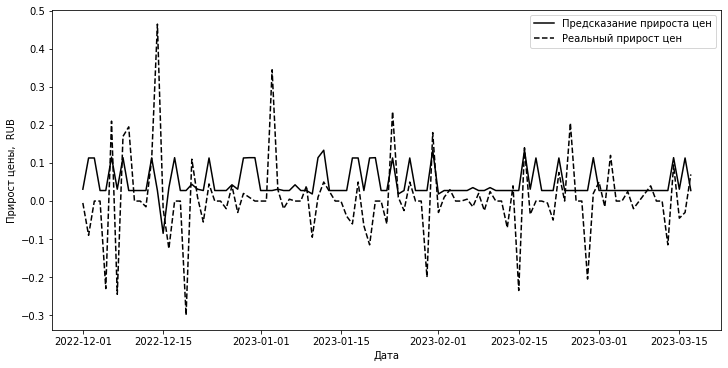

In [ ]:
regressor = AdaBoostRegressor(loss = 'linear', learning_rate=res_gp.x[0], n_estimators=res_gp.x[1])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\98985534.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\98985534.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature n

MSE = 0.01176


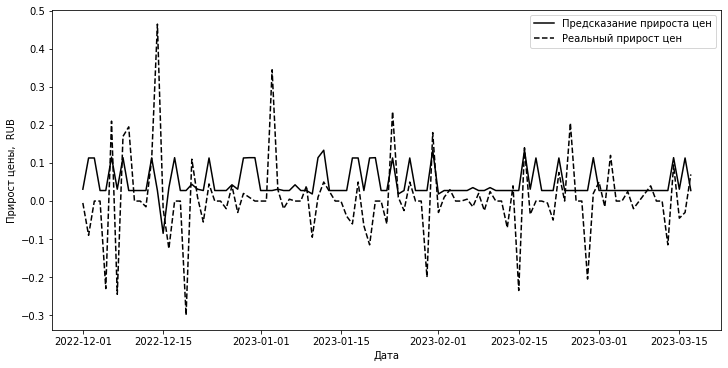

In [ ]:
prediction = []
X_data = X_train.copy()
y_data = y_train.copy()
regressor = AdaBoostRegressor(loss = 'linear', learning_rate=res_gp.x[0], n_estimators=res_gp.x[1])
for t in X_test.index:
   model = (regressor.fit(X_data.values, y_data.values))
   pred = model.predict(X_test.loc[t:])
   prediction.append(pred[0])
   X_data = X_data.append(X_test.loc[t])
   y_data.loc[t] = y_test.loc[t]

pred_val(y_test, predictions)

In [ ]:
from sklearn.ensemble import BaggingRegressor

reg = BaggingRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_samples'),
          Integer(1, n_features, name='max_features'),
          Integer(1, 100, name='verbose'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_samples=%d
- max_features=%d
- verbose=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3]))


Best score=0.0721
Best parameters:
- max_samples=5
- max_features=4
- verbose=76
- n_estimators=93


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for 

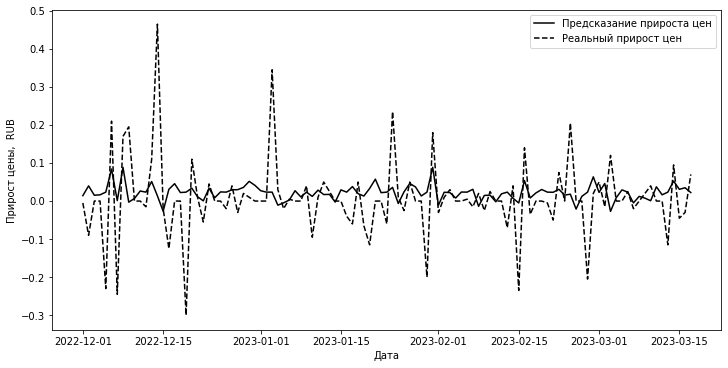

In [ ]:
regressor = BaggingRegressor(max_samples=res_gp.x[0], max_features=res_gp.x[1], verbose=res_gp.x[2], n_estimators=res_gp.x[3])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for 

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel ru

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 34 of 93 for this parallel run (total 93)...
Building estimator 35 of 93 for this parallel run (total 93)...
Building estimator 36 of 93 for this parallel run (total 93)...
Building estimator 37 of 93 for this parallel run (total 93)...
Building estimator 38 of 93 for this parallel run (total 93)...
Building estimator 39 of 93 for this parallel run (total 93)...
Building estimator 40 of 93 for this parallel run (total 93)...
Building estimator 41 of 93 for this parallel run (total 93)...
Building estimator 42 of 93 for this parallel run (total 93)...
Building estimator 43 of 93 for this parallel run (total 93)...
Building estimator 44 of 93 for this parallel run (total 93)...
Building estimator 45 of 93 for this parallel run (total 93)...
Building estimator 46 of 93 for this parallel run (total 93)...
Building estimator 47 of 93 for this parallel run (total 93)...
Building estimator 48 of 93 for this parallel run (total 93)...
Building estimator 49 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 89 of 93 for this parallel run (total 93)...
Building estimator 90 of 93 for this parallel run (total 93)...
Building estimator 91 of 93 for this parallel run (total 93)...
Building estimator 92 of 93 for this parallel run (total 93)...
Building estimator 93 of 93 for this parallel run (total 93)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 fo

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel run (total 93)...
Building estimator 18 of 93 for this parallel run (total 93)...
Building estimator 19 of 93 for this parallel 

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 62 of 93 for this parallel run (total 93)...
Building estimator 63 of 93 for this parallel run (total 93)...
Building estimator 64 of 93 for this parallel run (total 93)...
Building estimator 65 of 93 for this parallel run (total 93)...
Building estimator 66 of 93 for this parallel run (total 93)...
Building estimator 67 of 93 for this parallel run (total 93)...
Building estimator 68 of 93 for this parallel run (total 93)...
Building estimator 69 of 93 for this parallel run (total 93)...
Building estimator 70 of 93 for this parallel run (total 93)...
Building estimator 71 of 93 for this parallel run (total 93)...
Building estimator 72 of 93 for this parallel run (total 93)...
Building estimator 73 of 93 for this parallel run (total 93)...
Building estimator 74 of 93 for this parallel run (total 93)...
Building estimator 75 of 93 for this parallel run (total 93)...
Building estimator 76 of 93 for this parallel run (total 93)...
Building estimator 77 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building e

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 45 of 93 for this parallel run (total 93)...
Building estimator 46 of 93 for this parallel run (total 93)...
Building estimator 47 of 93 for this parallel run (total 93)...
Building estimator 48 of 93 for this parallel run (total 93)...
Building estimator 49 of 93 for this parallel run (total 93)...
Building estimator 50 of 93 for this parallel run (total 93)...
Building estimator 51 of 93 for this parallel run (total 93)...
Building estimator 52 of 93 for this parallel run (total 93)...
Building estimator 53 of 93 for this parallel run (total 93)...
Building estimator 54 of 93 for this parallel run (total 93)...
Building estimator 55 of 93 for this parallel run (total 93)...
Building estimator 56 of 93 for this parallel run (total 93)...
Building estimator 57 of 93 for this parallel run (total 93)...
Building estimator 58 of 93 for this parallel run (total 93)...
Building estimator 59 of 93 for this parallel run (total 93)...
Building estimator 60 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 22 of 93 for this parallel run (total 93)...
Building estimator 23 of 93 for this parallel run (total 93)...
Building estimator 24 of 93 for this parallel run (total 93)...
Building estimator 25 of 93 for this parallel run (total 93)...
Building estimator 26 of 93 for this parallel run (total 93)...
Building estimator 27 of 93 for this parallel run (total 93)...
Building estimator 28 of 93 for this parallel run (total 93)...
Building estimator 29 of 93 for this parallel run (total 93)...
Building estimator 30 of 93 for this parallel run (total 93)...
Building estimator 31 of 93 for this parallel run (total 93)...
Building estimator 32 of 93 for this parallel run (total 93)...
Building estimator 33 of 93 for this parallel run (total 93)...
Building estimator 34 of 93 for this parallel run (total 93)...
Building estimator 35 of 93 for this parallel run (total 93)...
Building estimator 36 of 93 for this parallel run (total 93)...
Building estimator 37 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 80 of 93 for this parallel run (total 93)...
Building estimator 81 of 93 for this parallel run (total 93)...
Building estimator 82 of 93 for this parallel run (total 93)...
Building estimator 83 of 93 for this parallel run (total 93)...
Building estimator 84 of 93 for this parallel run (total 93)...
Building estimator 85 of 93 for this parallel run (total 93)...
Building estimator 86 of 93 for this parallel run (total 93)...
Building estimator 87 of 93 for this parallel run (total 93)...
Building estimator 88 of 93 for this parallel run (total 93)...
Building estimator 89 of 93 for this parallel run (total 93)...
Building estimator 90 of 93 for this parallel run (total 93)...
Building estimator 91 of 93 for this parallel run (total 93)...
Building estimator 92 of 93 for this parallel run (total 93)...
Building estimator 93 of 93 for this parallel run (total 93)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Do

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel ru

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 59 of 93 for this parallel run (total 93)...
Building estimator 60 of 93 for this parallel run (total 93)...
Building estimator 61 of 93 for this parallel run (total 93)...
Building estimator 62 of 93 for this parallel run (total 93)...
Building estimator 63 of 93 for this parallel run (total 93)...
Building estimator 64 of 93 for this parallel run (total 93)...
Building estimator 65 of 93 for this parallel run (total 93)...
Building estimator 66 of 93 for this parallel run (total 93)...
Building estimator 67 of 93 for this parallel run (total 93)...
Building estimator 68 of 93 for this parallel run (total 93)...
Building estimator 69 of 93 for this parallel run (total 93)...
Building estimator 70 of 93 for this parallel run (total 93)...
Building estimator 71 of 93 for this parallel run (total 93)...
Building estimator 72 of 93 for this parallel run (total 93)...
Building estimator 73 of 93 for this parallel run (total 93)...
Building estimator 74 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel run (total 93)...
Building estimator 18 of 93 for this parallel r

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 33 of 93 for this parallel run (total 93)...
Building estimator 34 of 93 for this parallel run (total 93)...
Building estimator 35 of 93 for this parallel run (total 93)...
Building estimator 36 of 93 for this parallel run (total 93)...
Building estimator 37 of 93 for this parallel run (total 93)...
Building estimator 38 of 93 for this parallel run (total 93)...
Building estimator 39 of 93 for this parallel run (total 93)...
Building estimator 40 of 93 for this parallel run (total 93)...
Building estimator 41 of 93 for this parallel run (total 93)...
Building estimator 42 of 93 for this parallel run (total 93)...
Building estimator 43 of 93 for this parallel run (total 93)...
Building estimator 44 of 93 for this parallel run (total 93)...
Building estimator 45 of 93 for this parallel run (total 93)...
Building estimator 46 of 93 for this parallel run (total 93)...
Building estimator 47 of 93 for this parallel run (total 93)...
Building estimator 48 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for thi

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel run (total 93)...
Building estimator 18 of 93 for this parallel r

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 52 of 93 for this parallel run (total 93)...
Building estimator 53 of 93 for this parallel run (total 93)...
Building estimator 54 of 93 for this parallel run (total 93)...
Building estimator 55 of 93 for this parallel run (total 93)...
Building estimator 56 of 93 for this parallel run (total 93)...
Building estimator 57 of 93 for this parallel run (total 93)...
Building estimator 58 of 93 for this parallel run (total 93)...
Building estimator 59 of 93 for this parallel run (total 93)...
Building estimator 60 of 93 for this parallel run (total 93)...
Building estimator 61 of 93 for this parallel run (total 93)...
Building estimator 62 of 93 for this parallel run (total 93)...
Building estimator 63 of 93 for this parallel run (total 93)...
Building estimator 64 of 93 for this parallel run (total 93)...
Building estimator 65 of 93 for this parallel run (total 93)...
Building estimator 66 of 93 for this parallel run (total 93)...
Building estimator 67 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel ru

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 29 of 93 for this parallel run (total 93)...
Building estimator 30 of 93 for this parallel run (total 93)...
Building estimator 31 of 93 for this parallel run (total 93)...
Building estimator 32 of 93 for this parallel run (total 93)...
Building estimator 33 of 93 for this parallel run (total 93)...
Building estimator 34 of 93 for this parallel run (total 93)...
Building estimator 35 of 93 for this parallel run (total 93)...
Building estimator 36 of 93 for this parallel run (total 93)...
Building estimator 37 of 93 for this parallel run (total 93)...
Building estimator 38 of 93 for this parallel run (total 93)...
Building estimator 39 of 93 for this parallel run (total 93)...
Building estimator 40 of 93 for this parallel run (total 93)...
Building estimator 41 of 93 for this parallel run (total 93)...
Building estimator 42 of 93 for this parallel run (total 93)...
Building estimator 43 of 93 for this parallel run (total 93)...
Building estimator 44 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 85 of 93 for this parallel run (total 93)...
Building estimator 86 of 93 for this parallel run (total 93)...
Building estimator 87 of 93 for this parallel run (total 93)...
Building estimator 88 of 93 for this parallel run (total 93)...
Building estimator 89 of 93 for this parallel run (total 93)...
Building estimator 90 of 93 for this parallel run (total 93)...
Building estimator 91 of 93 for this parallel run (total 93)...
Building estimator 92 of 93 for this parallel run (total 93)...
Building estimator 93 of 93 for this parallel run (total 93)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend Sequent

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel ru

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 56 of 93 for this parallel run (total 93)...
Building estimator 57 of 93 for this parallel run (total 93)...
Building estimator 58 of 93 for this parallel run (total 93)...
Building estimator 59 of 93 for this parallel run (total 93)...
Building estimator 60 of 93 for this parallel run (total 93)...
Building estimator 61 of 93 for this parallel run (total 93)...
Building estimator 62 of 93 for this parallel run (total 93)...
Building estimator 63 of 93 for this parallel run (total 93)...
Building estimator 64 of 93 for this parallel run (total 93)...
Building estimator 65 of 93 for this parallel run (total 93)...
Building estimator 66 of 93 for this parallel run (total 93)...
Building estimator 67 of 93 for this parallel run (total 93)...
Building estimator 68 of 93 for this parallel run (total 93)...
Building estimator 69 of 93 for this parallel run (total 93)...
Building estimator 70 of 93 for this parallel run (total 93)...
Building estimator 71 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 17 of 93 for this parallel run (total 93)...
Building estimator 18 of 93 for this parallel run (total 93)...
Building estimator 19 of 93 for this parallel run (total 93)...
Building estimator 20 of 93 for this parallel run (total 93)...
Building estimator 21 of 93 for this parallel run (total 93)...
Building estimator 22 of 93 for this parallel run (total 93)...
Building estimator 23 of 93 for this parallel run (total 93)...
Building estimator 24 of 93 for this parallel run (total 93)...
Building estimator 25 of 93 for this parallel run (total 93)...
Building estimator 26 of 93 for this parallel run (total 93)...
Building estimator 27 of 93 for this parallel run (total 93)...
Building estimator 28 of 93 for this parallel run (total 93)...
Building estimator 29 of 93 for this parallel run (total 93)...
Building estimator 30 of 93 for this parallel run (total 93)...
Building estimator 31 of 93 for this parallel run (total 93)...
Building estimator 32 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 22 of 93 for this parallel run (total 93)...
Building estimator 23 of 93 for this parallel run (total 93)...
Building estimator 24 of 93 for this parallel run (total 93)...
Building estimator 25 of 93 for this parallel run (total 93)...
Building estimator 26 of 93 for this parallel run (total 93)...
Building estimator 27 of 93 for this parallel run (total 93)...
Building estimator 28 of 93 for this parallel run (total 93)...
Building estimator 29 of 93 for this parallel run (total 93)...
Building estimator 30 of 93 for this parallel run (total 93)...
Building estimator 31 of 93 for this parallel run (total 93)...
Building estimator 32 of 93 for this parallel run (total 93)...
Building estimator 33 of 93 for this parallel run (total 93)...
Building estimator 34 of 93 for this parallel run (total 93)...
Building estimator 35 of 93 for this parallel run (total 93)...
Building estimator 36 of 93 for this parallel run (total 93)...
Building estimator 37 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 69 of 93 for this parallel run (total 93)...
Building estimator 70 of 93 for this parallel run (total 93)...
Building estimator 71 of 93 for this parallel run (total 93)...
Building estimator 72 of 93 for this parallel run (total 93)...
Building estimator 73 of 93 for this parallel run (total 93)...
Building estimator 74 of 93 for this parallel run (total 93)...
Building estimator 75 of 93 for this parallel run (total 93)...
Building estimator 76 of 93 for this parallel run (total 93)...
Building estimator 77 of 93 for this parallel run (total 93)...
Building estimator 78 of 93 for this parallel run (total 93)...
Building estimator 79 of 93 for this parallel run (total 93)...
Building estimator 80 of 93 for this parallel run (total 93)...
Building estimator 81 of 93 for this parallel run (total 93)...
Building estimator 82 of 93 for this parallel run (total 93)...
Building estimator 83 of 93 for this parallel run (total 93)...
Building estimator 84 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel run (total 93)...
Building estimator 18 of 93 for this parallel run (total 93)...
Building estimator 19 of 93 for this parallel run (total 93)...
Building estimator 20 of 93 for this parallel run (total 93)...
Building estimator 21 of 93 for this parallel run (total 93)...
Building estimator 22 of 93 for this parallel run (total 93)...
Building estimator 23 of 93 for this paral

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 39 of 93 for this parallel run (total 93)...
Building estimator 40 of 93 for this parallel run (total 93)...
Building estimator 41 of 93 for this parallel run (total 93)...
Building estimator 42 of 93 for this parallel run (total 93)...
Building estimator 43 of 93 for this parallel run (total 93)...
Building estimator 44 of 93 for this parallel run (total 93)...
Building estimator 45 of 93 for this parallel run (total 93)...
Building estimator 46 of 93 for this parallel run (total 93)...
Building estimator 47 of 93 for this parallel run (total 93)...
Building estimator 48 of 93 for this parallel run (total 93)...
Building estimator 49 of 93 for this parallel run (total 93)...
Building estimator 50 of 93 for this parallel run (total 93)...
Building estimator 51 of 93 for this parallel run (total 93)...
Building estimator 52 of 93 for this parallel run (total 93)...
Building estimator 53 of 93 for this parallel run (total 93)...
Building estimator 54 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 81 of 93 for this parallel run (total 93)...
Building estimator 82 of 93 for this parallel run (total 93)...
Building estimator 83 of 93 for this parallel run (total 93)...
Building estimator 84 of 93 for this parallel run (total 93)...
Building estimator 85 of 93 for this parallel run (total 93)...
Building estimator 86 of 93 for this parallel run (total 93)...
Building estimator 87 of 93 for this parallel run (total 93)...
Building estimator 88 of 93 for this parallel run (total 93)...
Building estimator 89 of 93 for this parallel run (total 93)...
Building estimator 90 of 93 for this parallel run (total 93)...
Building estimator 91 of 93 for this parallel run (total 93)...
Building estimator 92 of 93 for this parallel run (total 93)...
Building estimator 93 of 93 for this parallel run (total 93)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for 

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 53 of 93 for this parallel run (total 93)...
Building estimator 54 of 93 for this parallel run (total 93)...
Building estimator 55 of 93 for this parallel run (total 93)...
Building estimator 56 of 93 for this parallel run (total 93)...
Building estimator 57 of 93 for this parallel run (total 93)...
Building estimator 58 of 93 for this parallel run (total 93)...
Building estimator 59 of 93 for this parallel run (total 93)...
Building estimator 60 of 93 for this parallel run (total 93)...
Building estimator 61 of 93 for this parallel run (total 93)...
Building estimator 62 of 93 for this parallel run (total 93)...
Building estimator 63 of 93 for this parallel run (total 93)...
Building estimator 64 of 93 for this parallel run (total 93)...
Building estimator 65 of 93 for this parallel run (total 93)...
Building estimator 66 of 93 for this parallel run (total 93)...
Building estimator 67 of 93 for this parallel run (total 93)...
Building estimator 68 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for 

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 27 of 93 for this parallel run (total 93)...
Building estimator 28 of 93 for this parallel run (total 93)...
Building estimator 29 of 93 for this parallel run (total 93)...
Building estimator 30 of 93 for this parallel run (total 93)...
Building estimator 31 of 93 for this parallel run (total 93)...
Building estimator 32 of 93 for this parallel run (total 93)...
Building estimator 33 of 93 for this parallel run (total 93)...
Building estimator 34 of 93 for this parallel run (total 93)...
Building estimator 35 of 93 for this parallel run (total 93)...
Building estimator 36 of 93 for this parallel run (total 93)...
Building estimator 37 of 93 for this parallel run (total 93)...
Building estimator 38 of 93 for this parallel run (total 93)...
Building estimator 39 of 93 for this parallel run (total 93)...
Building estimator 40 of 93 for this parallel run (total 93)...
Building estimator 41 of 93 for this parallel run (total 93)...
Building estimator 42 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 86 of 93 for this parallel run (total 93)...
Building estimator 87 of 93 for this parallel run (total 93)...
Building estimator 88 of 93 for this parallel run (total 93)...
Building estimator 89 of 93 for this parallel run (total 93)...
Building estimator 90 of 93 for this parallel run (total 93)...
Building estimator 91 of 93 for this parallel run (total 93)...
Building estimator 92 of 93 for this parallel run (total 93)...
Building estimator 93 of 93 for this parallel run (total 93)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel ru

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 56 of 93 for this parallel run (total 93)...
Building estimator 57 of 93 for this parallel run (total 93)...
Building estimator 58 of 93 for this parallel run (total 93)...
Building estimator 59 of 93 for this parallel run (total 93)...
Building estimator 60 of 93 for this parallel run (total 93)...
Building estimator 61 of 93 for this parallel run (total 93)...
Building estimator 62 of 93 for this parallel run (total 93)...
Building estimator 63 of 93 for this parallel run (total 93)...
Building estimator 64 of 93 for this parallel run (total 93)...
Building estimator 65 of 93 for this parallel run (total 93)...
Building estimator 66 of 93 for this parallel run (total 93)...
Building estimator 67 of 93 for this parallel run (total 93)...
Building estimator 68 of 93 for this parallel run (total 93)...
Building estimator 69 of 93 for this parallel run (total 93)...
Building estimator 70 of 93 for this parallel run (total 93)...
Building estimator 71 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel ru

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 32 of 93 for this parallel run (total 93)...
Building estimator 33 of 93 for this parallel run (total 93)...
Building estimator 34 of 93 for this parallel run (total 93)...
Building estimator 35 of 93 for this parallel run (total 93)...
Building estimator 36 of 93 for this parallel run (total 93)...
Building estimator 37 of 93 for this parallel run (total 93)...
Building estimator 38 of 93 for this parallel run (total 93)...
Building estimator 39 of 93 for this parallel run (total 93)...
Building estimator 40 of 93 for this parallel run (total 93)...
Building estimator 41 of 93 for this parallel run (total 93)...
Building estimator 42 of 93 for this parallel run (total 93)...
Building estimator 43 of 93 for this parallel run (total 93)...
Building estimator 44 of 93 for this parallel run (total 93)...
Building estimator 45 of 93 for this parallel run (total 93)...
Building estimator 46 of 93 for this parallel run (total 93)...
Building estimator 47 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 89 of 93 for this parallel run (total 93)...
Building estimator 90 of 93 for this parallel run (total 93)...
Building estimator 91 of 93 for this parallel run (total 93)...
Building estimator 92 of 93 for this parallel run (total 93)...
Building estimator 93 of 93 for this parallel run (total 93)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 fo

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel run (total 93)...
Building estimator 18 of 93 for this parallel r

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 54 of 93 for this parallel run (total 93)...
Building estimator 55 of 93 for this parallel run (total 93)...
Building estimator 56 of 93 for this parallel run (total 93)...
Building estimator 57 of 93 for this parallel run (total 93)...
Building estimator 58 of 93 for this parallel run (total 93)...
Building estimator 59 of 93 for this parallel run (total 93)...
Building estimator 60 of 93 for this parallel run (total 93)...
Building estimator 61 of 93 for this parallel run (total 93)...
Building estimator 62 of 93 for this parallel run (total 93)...
Building estimator 63 of 93 for this parallel run (total 93)...
Building estimator 64 of 93 for this parallel run (total 93)...
Building estimator 65 of 93 for this parallel run (total 93)...
Building estimator 66 of 93 for this parallel run (total 93)...
Building estimator 67 of 93 for this parallel run (total 93)...
Building estimator 68 of 93 for this parallel run (total 93)...
Building estimator 69 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 50 of 93 for this parallel run (total 93)...
Building estimator 51 of 93 for this parallel run (total 93)...
Building estimator 52 of 93 for this parallel run (total 93)...
Building estimator 53 of 93 for this parallel run (total 93)...
Building estimator 54 of 93 for this parallel run (total 93)...
Building estimator 55 of 93 for this parallel run (total 93)...
Building estimator 56 of 93 for this parallel run (total 93)...
Building estimator 57 of 93 for this parallel run (total 93)...
Building estimator 58 of 93 for this parallel run (total 93)...
Building estimator 59 of 93 for this parallel run (total 93)...
Building estimator 60 of 93 for this parallel run (total 93)...
Building estimator 61 of 93 for this parallel run (total 93)...
Building estimator 62 of 93 for this parallel run (total 93)...
Building estimator 63 of 93 for this parallel run (total 93)...
Building estimator 64 of 93 for this parallel run (total 93)...
Building estimator 65 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building e

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel run (total 93)...
Building estimator 18 of 93 for this parallel run (total 93)...
Building estimator 19 of 93 for this parallel run (total 93)...
Building estimator 20 of 93 for this parallel run (total 93)...
Building estimator 21 of 93 for this parallel run (total 93)...
Building estimator 22 of 93 for this parallel run (total 93)...
Building estimator 23 of 93 for this parallel run (total 93)...
Building estimator 24 of 93 for this para

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 61 of 93 for this parallel run (total 93)...
Building estimator 62 of 93 for this parallel run (total 93)...
Building estimator 63 of 93 for this parallel run (total 93)...
Building estimator 64 of 93 for this parallel run (total 93)...
Building estimator 65 of 93 for this parallel run (total 93)...
Building estimator 66 of 93 for this parallel run (total 93)...
Building estimator 67 of 93 for this parallel run (total 93)...
Building estimator 68 of 93 for this parallel run (total 93)...
Building estimator 69 of 93 for this parallel run (total 93)...
Building estimator 70 of 93 for this parallel run (total 93)...
Building estimator 71 of 93 for this parallel run (total 93)...
Building estimator 72 of 93 for this parallel run (total 93)...
Building estimator 73 of 93 for this parallel run (total 93)...
Building estimator 74 of 93 for this parallel run (total 93)...
Building estimator 75 of 93 for this parallel run (total 93)...
Building estimator 76 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel run (total 93)...
Building estimator 18 of 93 for this parallel run (total 93)...
Building estimator 19 of 93 for this parallel run (total 93)...
Building estimator 20 of 93 for this parallel run (total 93)...
Building estimator 21 of 93 for this parallel run (total 93)...
Building estimator 22 of 93 for this parallel run (total 93)...
Building estimator 23 of 93 for this parallel run (total 93)...
Building estimator 24 of 93 for this parallel run (total 93)...
Building estimator 25 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 39 of 93 for this parallel run (total 93)...
Building estimator 40 of 93 for this parallel run (total 93)...
Building estimator 41 of 93 for this parallel run (total 93)...
Building estimator 42 of 93 for this parallel run (total 93)...
Building estimator 43 of 93 for this parallel run (total 93)...
Building estimator 44 of 93 for this parallel run (total 93)...
Building estimator 45 of 93 for this parallel run (total 93)...
Building estimator 46 of 93 for this parallel run (total 93)...
Building estimator 47 of 93 for this parallel run (total 93)...
Building estimator 48 of 93 for this parallel run (total 93)...
Building estimator 49 of 93 for this parallel run (total 93)...
Building estimator 50 of 93 for this parallel run (total 93)...
Building estimator 51 of 93 for this parallel run (total 93)...
Building estimator 52 of 93 for this parallel run (total 93)...
Building estimator 53 of 93 for this parallel run (total 93)...
Building estimator 54 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building e

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for this parallel run (total 93)...
Building estimator 16 of 93 for this parallel run (total 93)...
Building estimator 17 of 93 for this parallel run (total 93)...
Building estimator 18 of 93 for this parallel run (total 93)...
Building estimator 19 of 93 for this parallel run (total 93)...
Building estimator 20 of 93 for this parallel run (total 93)...
Building estimator 21 of 93 for this parallel run (total 93)...
Building estimator 22 of 93 for this parallel run (total 93)...
Building estimator 23 of 93 for this parallel run (total 93)...
Building estimator 24 of 93 for this parallel run (total 93)...
Building estimator 25 of 93 for this parallel run (total 93)...
Building estimator 26 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 70 of 93 for this parallel run (total 93)...
Building estimator 71 of 93 for this parallel run (total 93)...
Building estimator 72 of 93 for this parallel run (total 93)...
Building estimator 73 of 93 for this parallel run (total 93)...
Building estimator 74 of 93 for this parallel run (total 93)...
Building estimator 75 of 93 for this parallel run (total 93)...
Building estimator 76 of 93 for this parallel run (total 93)...
Building estimator 77 of 93 for this parallel run (total 93)...
Building estimator 78 of 93 for this parallel run (total 93)...
Building estimator 79 of 93 for this parallel run (total 93)...
Building estimator 80 of 93 for this parallel run (total 93)...
Building estimator 81 of 93 for this parallel run (total 93)...
Building estimator 82 of 93 for this parallel run (total 93)...
Building estimator 83 of 93 for this parallel run (total 93)...
Building estimator 84 of 93 for this parallel run (total 93)...
Building estimator 85 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 93 for this parallel run (total 93)...
Building estimator 2 of 93 for this parallel run (total 93)...
Building estimator 3 of 93 for this parallel run (total 93)...
Building estimator 4 of 93 for this parallel run (total 93)...
Building estimator 5 of 93 for this parallel run (total 93)...
Building estimator 6 of 93 for this parallel run (total 93)...
Building estimator 7 of 93 for this parallel run (total 93)...
Building estimator 8 of 93 for this parallel run (total 93)...
Building estimator 9 of 93 for this parallel run (total 93)...
Building estimator 10 of 93 for this parallel run (total 93)...
Building estimator 11 of 93 for this parallel run (total 93)...
Building estimator 12 of 93 for this parallel run (total 93)...
Building estimator 13 of 93 for this parallel run (total 93)...
Building estimator 14 of 93 for this parallel run (total 93)...
Building estimator 15 of 93 for 

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 36 of 93 for this parallel run (total 93)...
Building estimator 37 of 93 for this parallel run (total 93)...
Building estimator 38 of 93 for this parallel run (total 93)...
Building estimator 39 of 93 for this parallel run (total 93)...
Building estimator 40 of 93 for this parallel run (total 93)...
Building estimator 41 of 93 for this parallel run (total 93)...
Building estimator 42 of 93 for this parallel run (total 93)...
Building estimator 43 of 93 for this parallel run (total 93)...
Building estimator 44 of 93 for this parallel run (total 93)...
Building estimator 45 of 93 for this parallel run (total 93)...
Building estimator 46 of 93 for this parallel run (total 93)...
Building estimator 47 of 93 for this parallel run (total 93)...
Building estimator 48 of 93 for this parallel run (total 93)...
Building estimator 49 of 93 for this parallel run (total 93)...
Building estimator 50 of 93 for this parallel run (total 93)...
Building estimator 51 of 93 for this par

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\2586520651.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])


Building estimator 93 of 93 for this parallel run (total 93)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
MSE = 0.01013


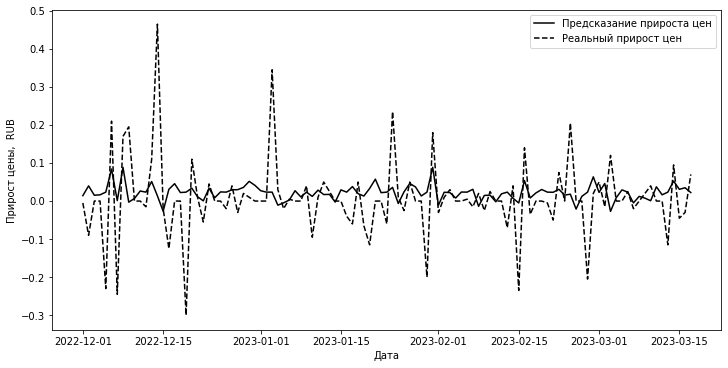

In [ ]:
prediction = []
X_data = X_train.copy()
y_data = y_train.copy()
regressor = BaggingRegressor(max_samples=res_gp.x[0], max_features=res_gp.x[1], verbose=res_gp.x[2], n_estimators=res_gp.x[3])
for t in X_test.index:
   model = (regressor.fit(X_data.values, y_data.values))
   pred = model.predict(X_test.loc[t:])
   prediction.append(pred[0])
   X_data = X_data.append(X_test.loc[t])
   y_data.loc[t] = y_test.loc[t]

pred_val(y_test, predictions)

In [ ]:
from lineartree           import LinearBoostRegressor

reg = LinearBoostRegressor(base_estimator=LinearRegression(), loss = 'linear')
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best score=0.0735
Best parameters:
- max_depth=1
- max_features=4
- min_samples_split=2
- min_samples_leaf=91
- n_estimators=16


MSE = 0.01072


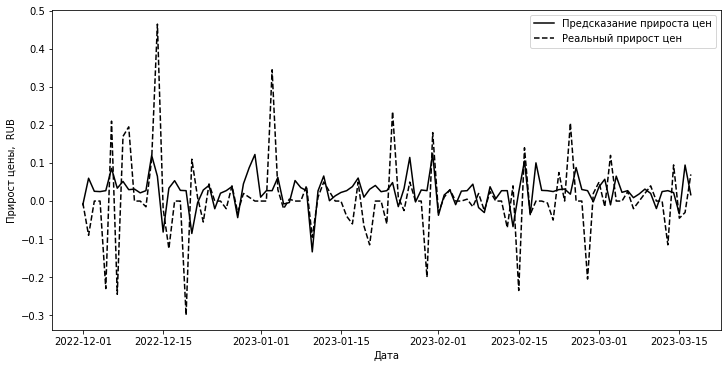

In [ ]:
regressor = LinearBoostRegressor(base_estimator=LinearRegression(),
                                 max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf=res_gp.x[3], n_estimators=res_gp.x[4])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearBoostRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\622599392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearBoostRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\622599392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearBoostRegressor was fitted with

MSE = 0.01072


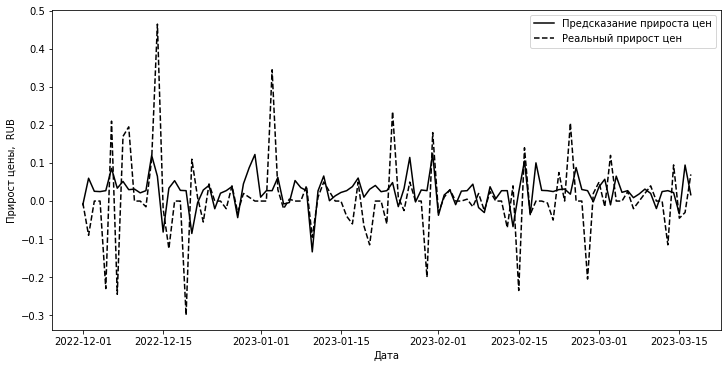

In [ ]:
prediction = []
X_data = X_train.copy()
y_data = y_train.copy()
regressor = LinearBoostRegressor(base_estimator=LinearRegression(),
                                 max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf=res_gp.x[3], n_estimators=res_gp.x[4])
for t in X_test.index:
   model = (regressor.fit(X_data.values, y_data.values))
   pred = model.predict(X_test.loc[t:])
   prediction.append(pred[0])
   X_data = X_data.append(X_test.loc[t])
   y_data.loc[t] = y_test.loc[t]

pred_val(y_test, predictions)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

reg = DecisionTreeRegressor(random_state = 0) 
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3]))


Best score=0.0721
Best parameters:
- max_depth=4
- max_features=3
- min_samples_split=97
- min_samples_leaf=44


MSE = 0.0129


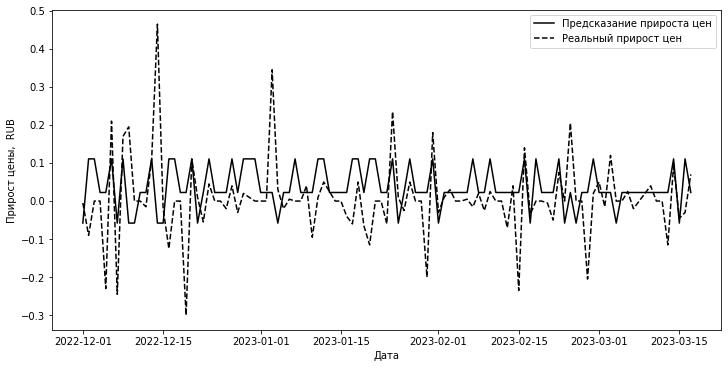

In [ ]:
regressor = DecisionTreeRegressor(max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf = res_gp.x[3])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\278548025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Temp\ipykernel_5996\278548025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted wit

MSE = 0.0129


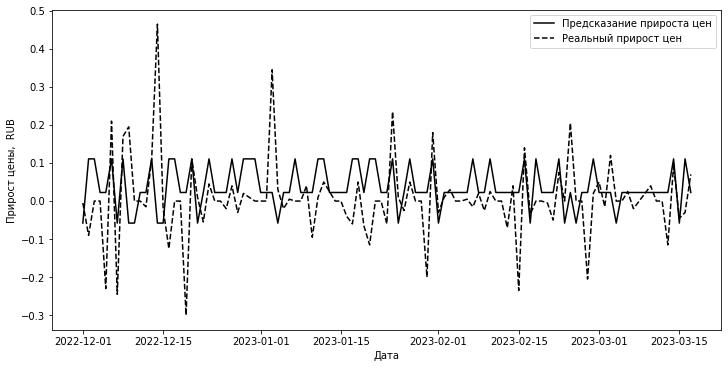

In [ ]:
prediction = []
X_data = X_train.copy()
y_data = y_train.copy()
regressor = DecisionTreeRegressor(max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf = res_gp.x[3])
for t in X_test.index:
   model = (regressor.fit(X_data.values, y_data.values))
   pred = model.predict(X_test.loc[t:])
   prediction.append(pred[0])
   X_data = X_data.append(X_test.loc[t])
   y_data.loc[t] = y_test.loc[t]

pred_val(y_test, predictions)

In [ ]:
predictions[-1]

0.02252293577981611

In [ ]:
df_alph_full['Indicative'][-1] - df_alph_full['Indicative'][-2]

0.06999999999999318

In [ ]:
df_alph.to_excel('data.xlsx')